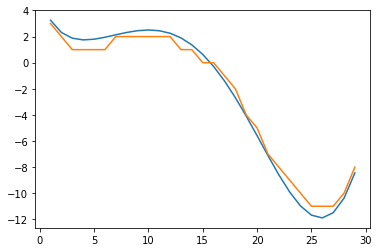

In [59]:
import numpy as np
from math import sin, exp
from matplotlib import pylab as plt
from scipy.optimize import minimize, differential_evolution

def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

D = np.arange(1, 30, 1)
E = list(map(f, D))
plt.plot(D, E)

# Минимизация гладкой функции
list_f_bfgs = np.array([f(minimize(f, x0, method='BFGS').x[0]) for x0 in [2, 30]])
with open('Задача 1. Минимизация гладкой функции.txt', 'w') as file_obj:
    file_obj.write(' '.join(map(str, np.round(list_f_bfgs, 2))))
    
# Глобальная оптимизация
f_global = f(differential_evolution(f, [(1, 30)]).x[0])
with open('Задача 2. Глобальная оптимизация.txt', 'w') as file_obj:
    file_obj.write(str(np.round(f_global, 2)))
    
# Минимизация негладкой функции
def h(x):
    return int(f(x))

list_h = np.array([h(minimize(h, 30, method='BFGS').x[0]), h(differential_evolution(h, [(1, 30)]).x[0])])

with open('Задача 3. Минимизация негладкой функции.txt', 'w') as file_obj:
    file_obj.write(' '.join(map(str, np.round(list_h, 2))))

E = list(map(h, D))
plt.plot(D, E)